In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# import just the Exeter data
exeter_data = pd.read_csv("Exeter_city_only.csv", header = 0)

In [31]:
exeter_data.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,LightGoodsVehicles,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles
count,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2007.000000,44260.562500,294044.312500,90973.375000,2.02500,1.253625,117.783333,323.862500,25339.662500,194.104167,4162.883333,645.445833,186.387500,79.454167,112.550000,233.920833,393.333333,1651.112500,31671.641667
std,4.329523,29998.460481,2132.815445,1595.575559,1.45842,0.905782,151.224386,175.163551,14129.083842,147.568045,2534.966129,586.312544,150.557666,73.015087,197.185801,440.634325,659.334060,1951.126575,18357.572019
min,2000.000000,6407.000000,290930.000000,88665.000000,0.50000,0.300000,0.000000,72.000000,7895.000000,27.000000,1063.000000,103.000000,31.000000,2.000000,4.000000,6.000000,9.000000,193.000000,9885.000000
25%,2003.000000,16971.750000,291880.000000,90087.500000,0.77500,0.475000,9.750000,192.750000,15683.500000,91.000000,2267.750000,254.750000,82.750000,33.750000,21.750000,28.000000,79.000000,560.750000,19208.000000
50%,2007.000000,37778.000000,294200.000000,90805.000000,1.75000,1.100000,85.500000,273.500000,21476.500000,136.000000,3269.500000,502.000000,153.000000,56.500000,44.000000,63.500000,135.500000,946.000000,25176.500000
75%,2011.000000,61809.500000,296075.000000,91394.750000,2.90000,1.817500,168.000000,430.000000,30174.500000,268.000000,5375.750000,754.000000,221.000000,99.000000,103.500000,113.500000,226.000000,1601.250000,38200.250000
max,2014.000000,99846.000000,297000.000000,95000.000000,5.70000,3.540000,1034.000000,862.000000,67688.000000,1120.000000,13695.000000,3362.000000,711.000000,399.000000,1261.000000,1994.000000,2975.000000,8159.000000,84219.000000


In [44]:
# Perhaps we just want to focus on the smaller roads in Exeter. Lets drop rows with M5 or 

exeter_inner = exeter_data[(exeter_data["Road"] != "M5") & (exeter_data["Road"] != "A30")]
exeter_outer = exeter_data[(exeter_data["Road"] == "M5") | (exeter_data["Road"] == "A30")]


In [46]:
# Check we have the right things in each
print(exeter_data["Road"][0:5])
print(exeter_inner["Road"][0:5])
print(exeter_outer["Road"][0:5])

0    A379
1      M5
2    A379
3    A377
4    A377
Name: Road, dtype: object
0    A379
2    A379
3    A377
4    A377
5    A377
Name: Road, dtype: object
1      M5
8     A30
10     M5
17     M5
24    A30
Name: Road, dtype: object


In [47]:
# how many count points for each?
print(exeter_inner["CP"].unique())
print(exeter_outer["CP"].unique())

[ 6407 16382 16971 16972 18081 26410 37674 47077 56414 77996 77997 99845
 99846]
[16023 37882 56192]


#### Only 3 count points in the outer roads.

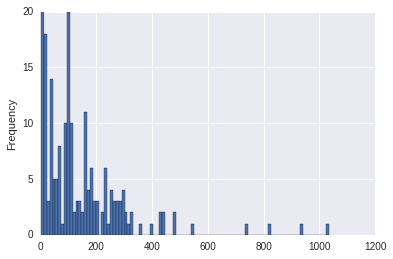

In [23]:
exeter_inner["PedalCycles"].plot.hist(bins = 100)

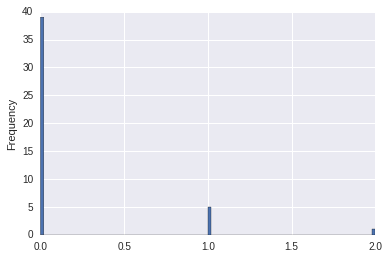

In [48]:
exeter_outer["PedalCycles"].plot.hist(bins = 100)

In [49]:
# Compare the statistics of the two
print(exeter_outer["PedalCycles"].describe())
print(exeter_inner["PedalCycles"].describe())

count    45.000000
mean      0.155556
std       0.424026
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: PedalCycles, dtype: float64
count     195.000000
mean      144.928205
std       155.638376
min         2.000000
25%        40.000000
50%       101.000000
75%       190.500000
max      1034.000000
Name: PedalCycles, dtype: float64


### Motorcycles

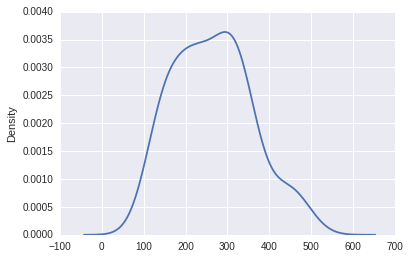

In [64]:
exeter_outer["Motorcycles"].plot.kde()

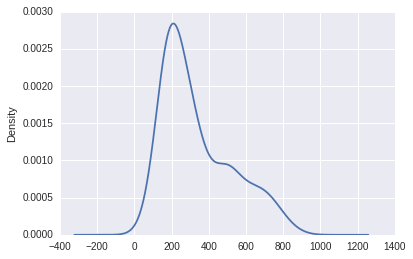

In [65]:
exeter_inner["Motorcycles"].plot.kde()

In [59]:
# Compare the statistics of the two
print(exeter_outer["Motorcycles"].describe())
print(exeter_inner["Motorcycles"].describe())

count     45.000000
mean     264.933333
std       92.345793
min      131.000000
25%      196.000000
50%      258.000000
75%      325.000000
max      479.000000
Name: Motorcycles, dtype: float64
count    195.000000
mean     337.461538
std      186.745188
min       72.000000
25%      192.500000
50%      277.000000
75%      477.500000
max      862.000000
Name: Motorcycles, dtype: float64


This makes sense - inside there are 337 and outside 264.

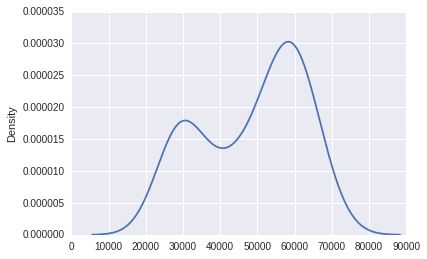

In [63]:
exeter_outer["CarsTaxis"].plot.kde()

### Relative size of the flow across the the roads in the last year

For each road, make it relative traffic flow for each vehicle type. This will result in a CP and associated % which can then be added to the road points dataframe. The higher the volume of that particular mode, the larger the dots.

In [71]:
# extract data for 2014
exeter_2014 = exeter_data[["AADFYear","CP","PedalCycles","Motorcycles","CarsTaxis","BusesCoaches",
                           "LightGoodsVehicles","AllHGVs","AllMotorVehicles"]][exeter_data["AADFYear"] == 2014]

print(list(exeter_2014))

['AADFYear', 'CP', 'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs', 'AllMotorVehicles']


In [78]:
mode = ['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs', 'AllMotorVehicles']

for m in mode:
    exeter_2014[m+"%"] = exeter_2014[m]/exeter_2014[m].sum()

In [80]:
list(exeter_2014)

['AADFYear',
 'CP',
 'PedalCycles',
 'Motorcycles',
 'CarsTaxis',
 'BusesCoaches',
 'LightGoodsVehicles',
 'AllHGVs',
 'AllMotorVehicles',
 'PedalCycles%',
 'Motorcycles%',
 'CarsTaxis%',
 'BusesCoaches%',
 'LightGoodsVehicles%',
 'AllHGVs%',
 'AllMotorVehicles%']

In [79]:
print(exeter_2014[["PedalCycles","PedalCycles%"]])

     PedalCycles  PedalCycles%
224          744      0.233375
225            0      0.000000
226           32      0.010038
227           95      0.029799
228          139      0.043601
229           11      0.003450
230           38      0.011920
231           68      0.021330
232            2      0.000627
233          159      0.049875
234            0      0.000000
235            2      0.000627
236          825      0.258783
237          282      0.088457
238          481      0.150878
239          310      0.097240


In [76]:
print(exeter_2014["PedalCycles%"].sum())

1.0


In [82]:
print(exeter_2014[0:5])

     AADFYear     CP  PedalCycles  Motorcycles  CarsTaxis  BusesCoaches  \
224      2014   6407          744          576      24513           279   
225      2014  16023            0          148      56860           225   
226      2014  16382           32          298      12700           124   
227      2014  16971           95          181       9791           176   
228      2014  16972          139          292      18409           125   

     LightGoodsVehicles  AllHGVs  AllMotorVehicles  PedalCycles%  \
224                5805      911             32084      0.233375   
225               13695     6640             77568      0.000000   
226                2572      744             16439      0.010038   
227                1910      456             12513      0.029799   
228                3467      639             22932      0.043601   

     Motorcycles%  CarsTaxis%  BusesCoaches%  LightGoodsVehicles%  AllHGVs%  \
224      0.123499    0.061233       0.082131             0.07

In [83]:
# import the mapping data from road_coords.csv
road_coords = pd.read_csv("road_coords.csv", header = 0)

In [92]:
len(road_coords)
road_coords[0:20]

,CP,GridReference,Easting,Northing,Latitude,Longitude,Road,LinkLength_miles,RoadCategory,PedalCycles%
0,6407,SX 93715 89043,293715,89043,50.691292,-3.506076,A379,0.55,PR,0
1,6407,SX 93841 89119,293841,89119,50.691999,-3.504317,A379,0.55,PR,0
2,6407,SX 93955 89231,293955,89231,50.693032,-3.502729,A379,0.55,PR,0
3,6407,SX 94288 89633,294288,89633,50.696702,-3.498137,A379,0.55,PR,0
4,6407,SX 94180 89559,294180,89559,50.696023,-3.499639,A379,0.55,PR,0
5,6407,SX 94088 89498,294088,89498,50.695452,-3.500926,A379,0.55,PR,0
6,6407,SX 94026 89439,294026,89439,50.694908,-3.501785,A379,0.55,PR,0
7,6407,SX 94010 89384,294010,89384,50.694419,-3.501999,A379,0.55,PR,0
8,16023,SX 96870 93012,296870,93012,50.727546,-3.462539,M5,1.11,TM,0
9,16023,SX 96861 92245,296861,92245,50.720645,-3.462453,M5,1.11,TM,0


In [103]:
# Loop over the unique CP values in exeter_2014 and insert an extra column to the rooad_coords with the % values for each
# of the road categories

mode = ['PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles', 'AllHGVs', 'AllMotorVehicles']

    
for m in mode:
    road_coords[m+"%"] = 0
    for CP in exeter_2014["CP"]:        
        #print(CP)
        n = len(road_coords[road_coords["CP"] == CP])
        #print(n)
        road_coords[m+"%"][road_coords["CP"] == CP] = (exeter_2014[m+"%"][exeter_2014["CP"] == CP].tolist()) * n
    

/home/sophie/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Now we have a dataframe with normalised for every data point along it's road.
Save it for later use.

In [109]:
# Save the new dataframe of points for later use
road_coords.to_csv('road_coords_norm_vals.csv', index = False)

In [108]:
print(road_coords["PedalCycles%"].unique())
print(exeter_2014["PedalCycles%"])

[ 0.23337516  0.          0.01003764  0.02979925  0.043601    0.00345044
  0.0119197   0.02132999  0.00062735  0.04987453  0.25878294  0.08845671
  0.15087829  0.09723965]
224    0.233375
225    0.000000
226    0.010038
227    0.029799
228    0.043601
229    0.003450
230    0.011920
231    0.021330
232    0.000627
233    0.049875
234    0.000000
235    0.000627
236    0.258783
237    0.088457
238    0.150878
239    0.097240
Name: PedalCycles%, dtype: float64
